In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import lifelines

In [3]:
prison = pd.read_csv('datasets/rossi.csv', index_col=0)
prison.head()

,week,arrest,fin,age,race,wexp,mar,paro,prio
0,20,1,0,27,1,0,0,1,3
1,17,1,0,18,1,0,0,1,8
2,25,1,0,19,0,1,0,1,13
3,52,0,1,23,1,1,1,1,1
4,52,0,0,19,0,1,0,1,3


## Draw a survival curve
You are a sociologist studying how convicts behave after their release. The DataFrame `prison` contains the information from 432 convicts who were released from Maryland state prisons in the 1970s and who were followed up with one year after release. There are two main columns of interest:

* `week`: the number of weeks elapsed since release
* `arrest`: whether the convict has been re-arrested within one year after release
A Kaplan Meier survival function has been fitted for you and the model object is called `prison_kmf`. Can you visualize the survival curve of `prison_kmf`?

The matplotlib.pyplot library is imported as plt and the lifelines module has also been imported for you.

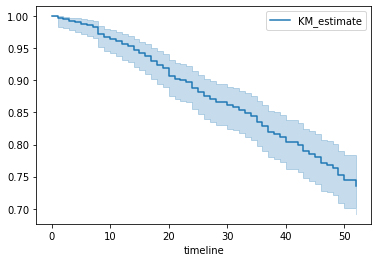

In [4]:
prison_kmf = lifelines.KaplanMeierFitter()
prison_kmf.fit(prison['week'], prison['arrest'])
prison_kmf.plot()
plt.show()

## Compare Weibull model parameters
Some convicts in the study were released on parole. Because parolees experience stricter restrictions, you suspect that their initial arrest rate is high but decreases as time goes on, while other convicts' arrest rate increases as time goes on.

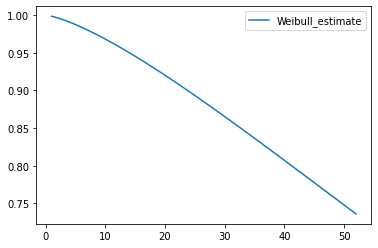

In [5]:
# Import WeibullFitter class
from lifelines import WeibullFitter

# Instantiate WeibullFitter class wb
wb = WeibullFitter()

# Fit data to wb
wb.fit(prison['week'], prison['arrest'])

# Plot survival function
wb.survival_function_.plot()
plt.show()

In [6]:
# Mask for parole
parole = (prison['paro'] == 1)

# Fit to parolee data
wb.fit(durations=prison[parole]['week'], event_observed=prison[parole]['arrest'])

# Print rho
print("The rho_ parameter of parolee survival function is: ", wb.rho_)

# Fit to non parolee
wb.fit(durations=prison[prison['paro'] == 0]['week'], event_observed=prison[prison['paro'] == 0]['arrest'])

# Print rho
print("The rho_ parameter of non-parolee survival function is: ", wb.rho_)

The rho_ parameter of parolee survival function is:  1.4181024400796285
The rho_ parameter of non-parolee survival function is:  1.2943809760486589


You suspect that parolees' arrest rate decreases as time goes on while other convicts' arrest rate increases as time goes on.

Based on the  values printed and what you know about the Weibull distribution, our suspicion is not verified because both population's rate of event increase with time

## How do prior arrests impact re-arrest rate?
During the study of the `prison` data, you obtain new information about each convict, such as **the number of convictions prior to current incarceration** `prio`.

You want to visualize how different values of prio impact the baseline survival function modeled with WeibullAFTFitter.

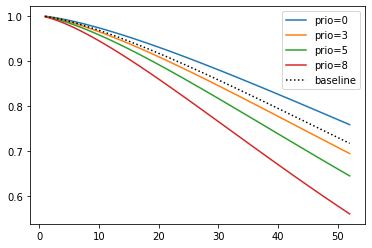

In [8]:
from lifelines import WeibullAFTFitter
# Fit data to aft
aft = WeibullAFTFitter()
aft.fit(df=prison,
        duration_col='week',
        event_col='arrest')

# Plot partial effects of prio
aft.plot_partial_effects_on_outcome('prio', [0, 3, 5, 8])
plt.show()

From the plot, you could infer the average value range for prio in the original data is between 0 and 3.